In [1]:
import numpy as np
import pandas as pd
import matplotlib
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure
from matplotlib.pyplot import NullFormatter
from lifelines.statistics import logrank_test

In [2]:
# Importing the dataset
dataset = pd.read_csv('11.csv')
dataset.sample(5)

,record,age,race,sex,ms,hisp,adjinc,educ,pob,wt,...,tenure,citizen,health,indalg,smok100,agesmk,smokstat,smokhome,curruse,everuse
1230551,1299081,56,1.0,2,1.0,3.0,12.0,8.0,104,102,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1502119,1570634,58,1.0,1,1.0,3.0,11.0,7.0,901,199,...,1.0,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1557598,1625351,30,1.0,2,3.0,3.0,5.0,11.0,948,220,...,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320907,236723,8,2.0,1,NaN,3.0,1.0,NaN,910,35,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
475542,361848,40,1.0,2,1.0,3.0,12.0,8.0,926,180,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Creating Duration array and Outcome array to fit the model
D = dataset["follow"]
O = dataset["inddea"]

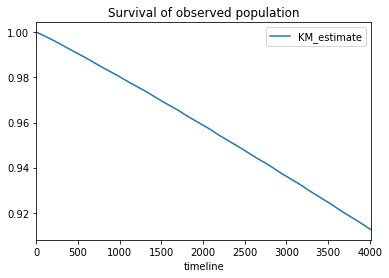

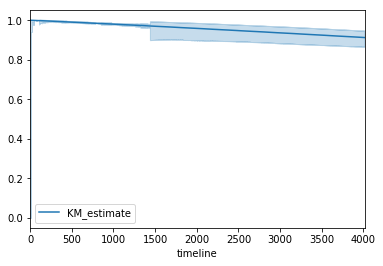

In [4]:
# Creating KMF model
kmf = KaplanMeierFitter()
kmf.fit(D, event_observed=O)
kmf.survival_function_.plot()
plt.title('Survival of observed population')
kmf.plot()

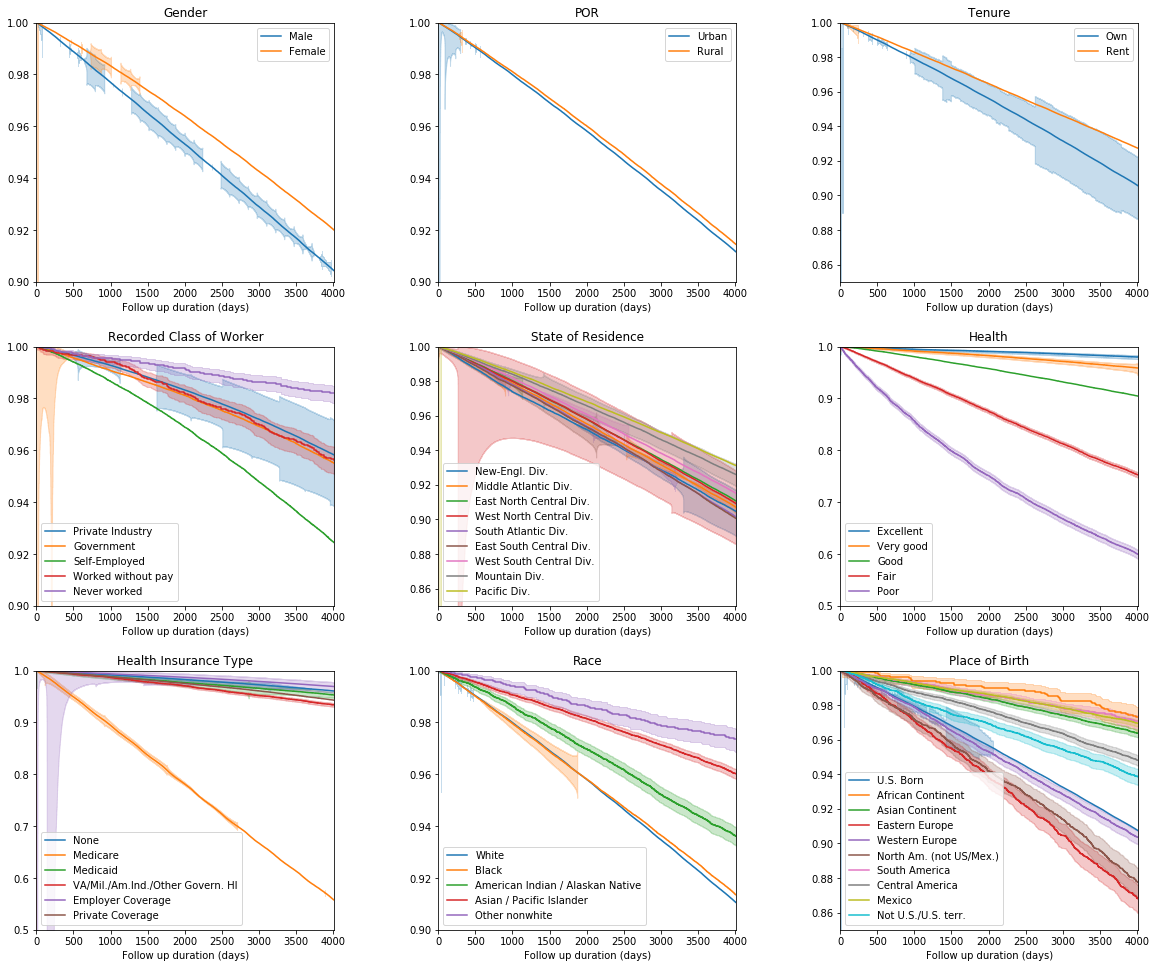

In [5]:
# Arranging all plots together to facilitate visual comparison
# Plotting survival probability by Gender
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(331)
sex = (dataset["sex"] == 1)
kmf.fit(D[sex], event_observed=O[sex], label="Male")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~sex], event_observed=O[~sex], label="Female")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Gender")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Urban vs Rural POR
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(332)
POR = (dataset["urban"] == 1)
kmf.fit(D[POR], event_observed=O[POR], label="Urban")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~POR], event_observed=O[~POR], label="Rural")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("POR")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Tenure
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(333)
ten = (dataset["tenure"] == 1)
kmf.fit(D[ten], event_observed=O[ten], label="Own")
kmf.plot(ax=ax, ci_force_lines=False)
kmf.fit(D[~ten], event_observed=O[~ten], label="Rent")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("Tenure")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by RCOW
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(334)
rcow = (dataset["rcow"] == 1)
kmf.fit(D[rcow], event_observed=O[rcow], label="Private Industry")
kmf.plot(ax=ax, ci_force_lines=False)
rcow2 = (dataset["rcow"] == 2)
kmf.fit(D[rcow2], event_observed=O[rcow2], label="Government")
kmf.plot(ax=ax, ci_force_lines=False)
rcow3 = (dataset["rcow"] == 3)
kmf.fit(D[rcow3], event_observed=O[rcow3], label="Self-Employed")
kmf.plot(ax=ax, ci_force_lines=False)
rcow4 = (dataset["rcow"] == 4)
kmf.fit(D[rcow4], event_observed=O[rcow4], label="Worked without pay")
kmf.plot(ax=ax, ci_force_lines=False)
rcow5 = (dataset["rcow"] == 5)
kmf.fit(D[rcow5], event_observed=O[rcow5], label="Never worked")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1);
plt.title("Recorded Class of Worker")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by StateR
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(335)
ned=[11,12,13,14,15,16]
mad=[21,22,23]
encd=[31,32,33,34,35]
wncd=[41,42,43,44,45,46,47]
sad=[51,52,53,54,55,56,57,58,59]
escd=[61,62,63,64]
wscd=[71,72,73,74]
md=[81,82,83,84,85,86,87,88]
pd=[91,92,93,94,95]
state1 = (dataset["stater"].isin (ned))
kmf.fit(D[state1], event_observed=O[state1], label="New-Engl. Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state2 = (dataset["stater"].isin (mad))
kmf.fit(D[state2], event_observed=O[state2], label="Middle Atlantic Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state3 = (dataset["stater"].isin (encd))
kmf.fit(D[state3], event_observed=O[state3], label="East North Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state4 = (dataset["stater"].isin (wncd))
kmf.fit(D[state4], event_observed=O[state4], label="West North Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state5 = (dataset["stater"].isin (sad))
kmf.fit(D[state5], event_observed=O[state5], label="South Atlantic Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state6 = (dataset["stater"].isin (escd))
kmf.fit(D[state6], event_observed=O[state6], label="East South Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state7 = (dataset["stater"].isin (wscd))
kmf.fit(D[state7], event_observed=O[state7], label="West South Central Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state8 = (dataset["stater"].isin (md))
kmf.fit(D[state8], event_observed=O[state8], label="Mountain Div.")
kmf.plot(ax=ax, ci_force_lines=False)
state9 = (dataset["stater"].isin (pd))
kmf.fit(D[state9], event_observed=O[state9], label="Pacific Div.")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1);
plt.title("State of Residence")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(336)
health1 = (dataset["health"]==1)
kmf.fit(D[health1], event_observed=O[health1], label="Excellent")
kmf.plot(ax=ax, ci_force_lines=False)
health2 = (dataset["health"]==2)
kmf.fit(D[health2], event_observed=O[health2], label="Very good")
kmf.plot(ax=ax, ci_force_lines=False)
health3 = (dataset["health"]==3)
kmf.fit(D[health3], event_observed=O[health3], label="Good")
kmf.plot(ax=ax, ci_force_lines=False)
health4 = (dataset["health"]==4)
kmf.fit(D[health4], event_observed=O[health4], label="Fair")
kmf.plot(ax=ax, ci_force_lines=False)
health5 = (dataset["health"]==5)
kmf.fit(D[health5], event_observed=O[health5], label="Poor")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Health Insurance Type
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(337)
hitype = (dataset["hitype"]==0)
kmf.fit(D[hitype], event_observed=O[hitype], label="None")
kmf.plot(ax=ax, ci_force_lines=False)
hitype1 = (dataset["hitype"]==1)
kmf.fit(D[hitype1], event_observed=O[hitype1], label="Medicare")
kmf.plot(ax=ax, ci_force_lines=False)
hitype2 = (dataset["hitype"]==2)
kmf.fit(D[hitype2], event_observed=O[hitype2], label="Medicaid")
kmf.plot(ax=ax, ci_force_lines=False)
hitype3 = (dataset["hitype"]==3)
kmf.fit(D[hitype3], event_observed=O[hitype3], label="VA/Mil./Am.Ind./Other Govern. HI")
kmf.plot(ax=ax, ci_force_lines=False)
hitype4 = (dataset["hitype"]==4)
kmf.fit(D[hitype4], event_observed=O[hitype4], label="Employer Coverage")
kmf.plot(ax=ax, ci_force_lines=False)
hitype5 = (dataset["hitype"]==5)
kmf.fit(D[hitype5], event_observed=O[hitype5], label="Private Coverage")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.5, 1);
plt.title("Health Insurance Type")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by Race
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(338)
race1 = (dataset["race"]==1)
kmf.fit(D[race1], event_observed=O[race1], label="White")
kmf.plot(ax=ax, ci_force_lines=False)
race2 = (dataset["race"]==2)
kmf.fit(D[race2], event_observed=O[race2], label="Black")
kmf.plot(ax=ax, ci_force_lines=False)
race3 = (dataset["race"]==3)
kmf.fit(D[race3], event_observed=O[race3], label="American Indian / Alaskan Native")
kmf.plot(ax=ax, ci_force_lines=False)
race4 = (dataset["race"]==4)
kmf.fit(D[race4], event_observed=O[race4], label="Asian / Pacific Islander")
kmf.plot(ax=ax, ci_force_lines=False)
race5 = (dataset["race"]==5)
kmf.fit(D[race5], event_observed=O[race5], label="Other nonwhite")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.9, 1)
plt.title("Race")
plt.xlabel("Follow up duration (days)")
# Plotting survival probability by POB
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,15)
ax = plt.subplot(339)
us=[901,902,904,905, 906, 908, 909,910,911,912,913,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,944,945,946,947,948,949,950,951,953,954,955,956,957,958, 959,960]
pob1 = (dataset["pob"].isin(us))
kmf.fit(D[pob1], event_observed=O[pob1], label="U.S. Born")
kmf.plot(ax=ax, ci_force_lines=False)
pob2 = (dataset["pob"]==101)
kmf.fit(D[pob2], event_observed=O[pob2], label="African Continent")
kmf.plot(ax=ax, ci_force_lines=False)
pob3 = (dataset["pob"]==102)
kmf.fit(D[pob3], event_observed=O[pob3], label="Asian Continent")
kmf.plot(ax=ax, ci_force_lines=False)
pob4 = (dataset["pob"]==103)
kmf.fit(D[pob4], event_observed=O[pob4], label="Eastern Europe")
kmf.plot(ax=ax, ci_force_lines=False)
pob5 = (dataset["pob"]==104)
kmf.fit(D[pob5], event_observed=O[pob5], label="Western Europe")
kmf.plot(ax=ax, ci_force_lines=False)
pob6 = (dataset["pob"]==105)
kmf.fit(D[pob6], event_observed=O[pob6], label="North Am. (not US/Mex.)")
kmf.plot(ax=ax, ci_force_lines=False)
pob7 = (dataset["pob"]==106)
kmf.fit(D[pob7], event_observed=O[pob7], label="South America")
kmf.plot(ax=ax, ci_force_lines=False)
pob8 = (dataset["pob"]==107)
kmf.fit(D[pob8], event_observed=O[pob8], label="Central America")
kmf.plot(ax=ax, ci_force_lines=False)
pob9 = (dataset["pob"]==108)
kmf.fit(D[pob9], event_observed=O[pob9], label="Mexico")
kmf.plot(ax=ax, ci_force_lines=False)
pob10 = (dataset["pob"]==111)
kmf.fit(D[pob10], event_observed=O[pob10], label="Not U.S./U.S. terr.")
kmf.plot(ax=ax, ci_force_lines=False)
plt.ylim(0.85, 1)
plt.title("Place of Birth")
plt.xlabel("Follow up duration (days)")

plt.gca().yaxis.set_minor_formatter(NullFormatter())
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()